# RAIN IN AUSTRALIA
Predict next-day rain in Australia

# About Dataset

Predict next-day rain by training classification models on the target variable RainTomorrow.
This dataset contains about 10 years of daily weather observations from many locations across Australia.



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [39]:
data=pd.read_csv("weatherAUS.csv")

In [40]:
pd.set_option('display.max_columns',None)

In [41]:
data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [42]:
data.shape

(145460, 23)

In [43]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [44]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [45]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

DATA CLEANINIG

In [47]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [48]:
#fill null values using interpolate method
data['MinTemp'].interpolate(inplace=True)
data['MaxTemp'].interpolate(inplace=True)
data['Rainfall'].interpolate(inplace=True)
data['Evaporation'].interpolate(inplace=True)
data['Sunshine'].interpolate(inplace=True)
data['WindGustSpeed'].interpolate(inplace=True)
data['WindSpeed9am'].interpolate(inplace=True)
data['WindSpeed3pm'].interpolate(inplace=True)
data['Humidity9am'].interpolate(inplace=True)
data['Humidity3pm'].interpolate(inplace=True)
data['Cloud9am'].interpolate(inplace=True)
data['Cloud3pm'].interpolate(inplace=True)

In [49]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.75,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.50,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.60,4.500000,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,3.40,3.666667,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,3.20,2.833333,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,10.0,10.7,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.00,2.000000,15.1,26.0,No,No


In [50]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       6049
Sunshine          6049
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             2
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [51]:
data.dropna(inplace=True)

In [52]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.000000,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.000000,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.000000,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.000000,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.000000,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,10.0,10.7,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,3.8,5.333333,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.6,4.500000,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,3.4,3.666667,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,3.2,2.833333,12.5,26.1,No,No


In [53]:
data.shape

(108964, 23)

In [54]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [55]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [56]:
data.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorahHead', 'NorfolkIsland',
       'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin',
       'Katherine', 'Uluru'], dtype=object)

1.find the rain fall in location cobar and Evaporation below above 10

In [57]:
data[(data.Location == 'cobar') & (data.Evaporation>10)].count()['Rainfall']

0

2.what was the lowest maxTemp in Darwin when the sunshine was below 11.7 ?

In [58]:
data[(data.Location == 'Darwin') & (data.Sunshine < 11.7)].groupby('MaxTemp').count()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MaxTemp,,,,,,,,,,,,,,,,,,,,,,
21.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24.8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
25.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
25.4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
25.6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
37.4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
37.5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


3.select the highest windguts speed during tommorows rain during the maxtemp above 32.3?

In [59]:
data[(data.RainTomorrow == 1) & (data.MaxTemp >32.3)].count()['WindGustSpeed']

0

4.select rainfall in mintemp 9.2 and location Mildura

In [60]:
data[(data.Location =='Mildura') & (data.MinTemp==9.2)].count()['Rainfall']


22

DATA VISUALIZATION

COUNT PLOT OF COLUMNS USING HISTOGRAM

 1 plot WindGustDir column 

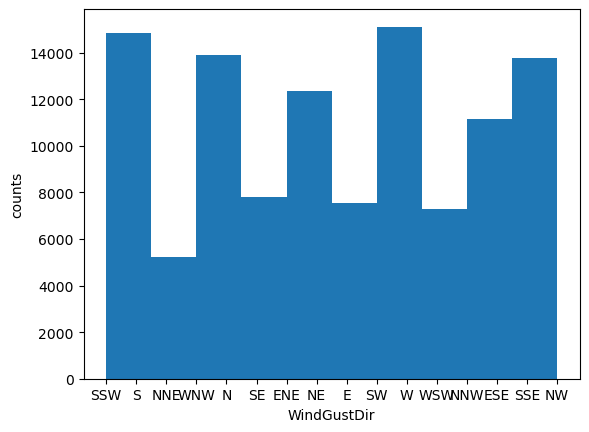

In [134]:
plt.hist(data['WindGustDir'])
plt.xlabel('WindGustDir')
plt.ylabel('counts')
plt.show()

2 plot WindGustSpeed column

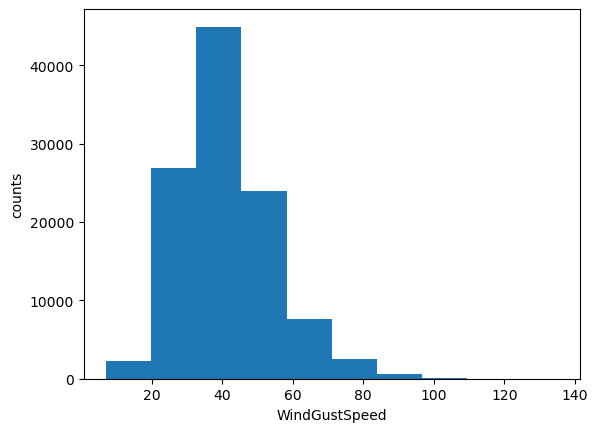

In [135]:
plt.hist(data['WindGustSpeed'])
plt.xlabel('WindGustSpeed')
plt.ylabel('counts')
plt.show()

3 plot WindDir9am column

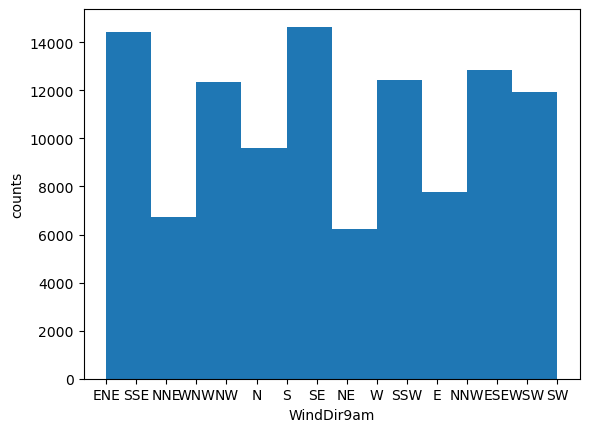

In [136]:
plt.hist(data['WindDir9am'])
plt.xlabel('WindDir9am')
plt.ylabel('counts')
plt.show()

4 plot WindDir3pm column

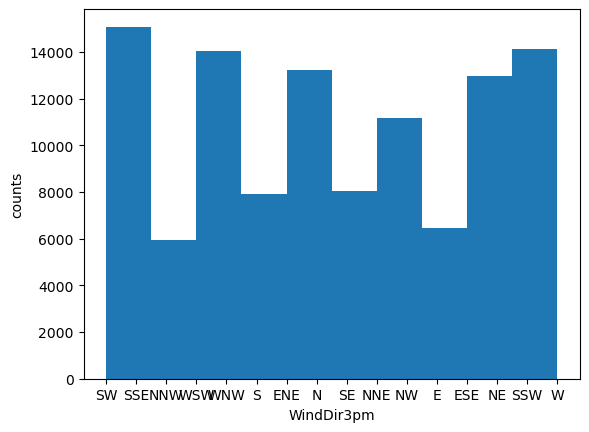

In [137]:
plt.hist(data['WindDir3pm'])
plt.xlabel('WindDir3pm')
plt.ylabel('counts')
plt.show()

5 plot WindSpeed9am  column

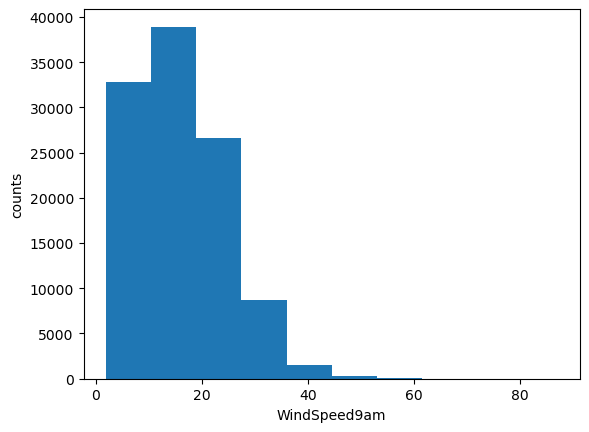

In [138]:
plt.hist(data['WindSpeed9am'])
plt.xlabel('WindSpeed9am')
plt.ylabel('counts')
plt.show()

6 plot WindSpeed3pm column

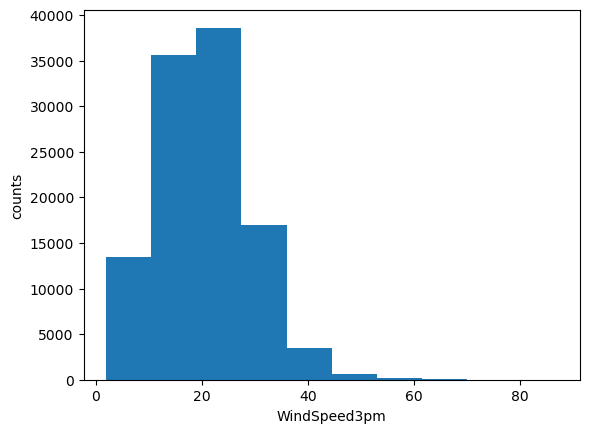

In [139]:
plt.hist(data['WindSpeed3pm'])
plt.xlabel('WindSpeed3pm')
plt.ylabel('counts')
plt.show()

7 plot Cloud9am column

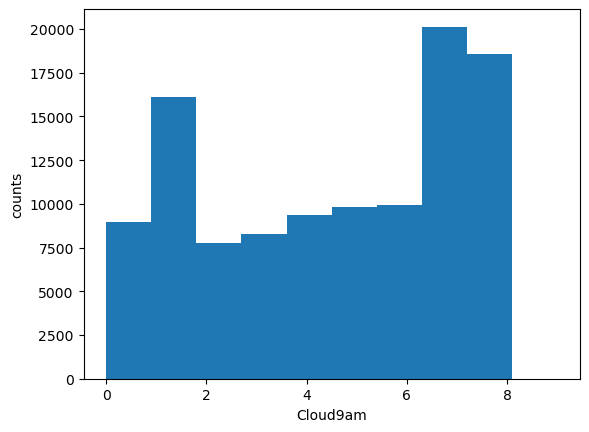

In [140]:
plt.hist(data['Cloud9am'])
plt.xlabel('Cloud9am')
plt.ylabel('counts')
plt.show()

8 plot Cloud3pm column

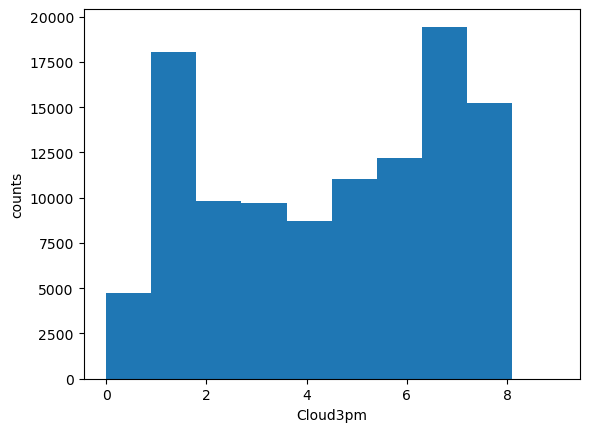

In [141]:
plt.hist(data['Cloud3pm'])
plt.xlabel('Cloud3pm')
plt.ylabel('counts')
plt.show()

plot  sunshine vs rain fall

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

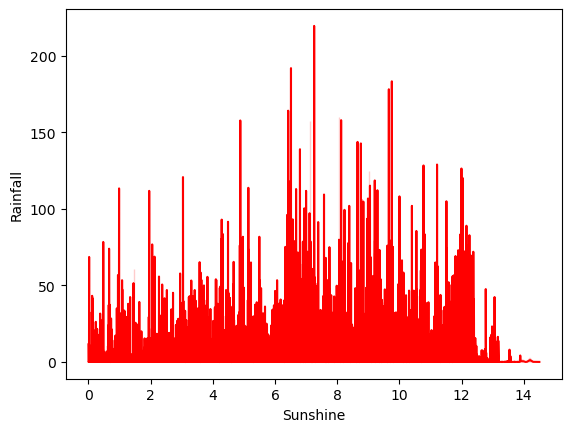

In [155]:
sb.lineplot(data=data,x='Sunshine',y='Rainfall',color='red')

plot windGustspeed vs rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

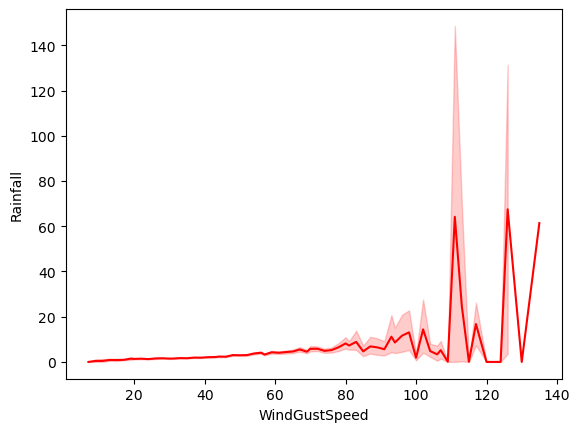

In [157]:
sb.lineplot(data=data,x="WindGustSpeed",y="Rainfall",color='red')

plot highest temparature and amount of rainfall using scatter plot

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

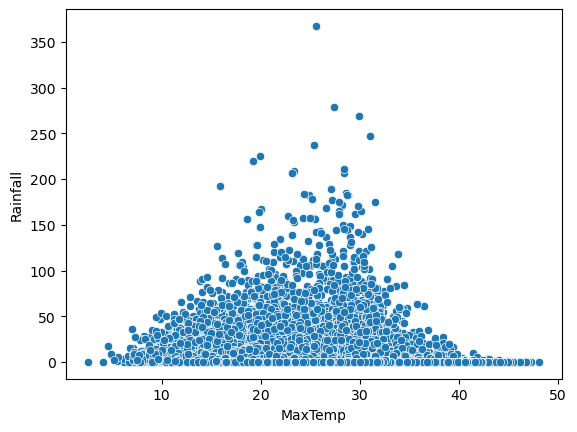

In [61]:
sb.scatterplot(x='MaxTemp', y='Rainfall', data=data)

plot lowest temparature and amount of rainfall using scatter plot

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

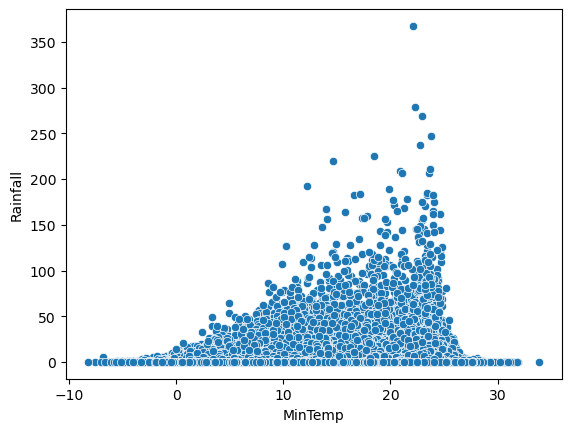

In [60]:
sb.scatterplot(x='MinTemp', y='Rainfall', data=data)

Rain Today and Rain Tomorrow Visualisation

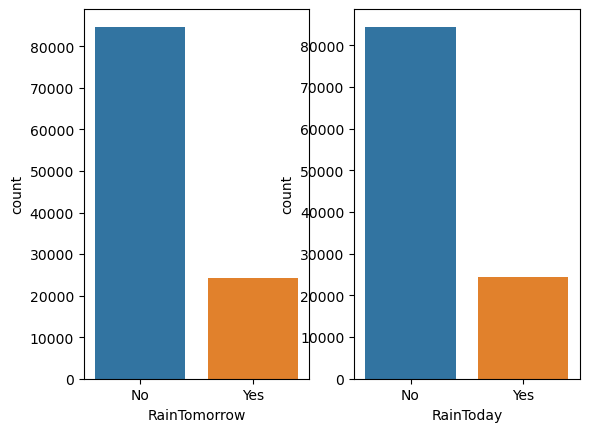

In [38]:
fig,ax= plt.subplots(1,2)
sb.countplot(data = data,x='RainTomorrow',ax=ax[0])
sb.countplot(data = data,x='RainToday',ax=ax[1])
plt.show()

plotting average rainfall by location

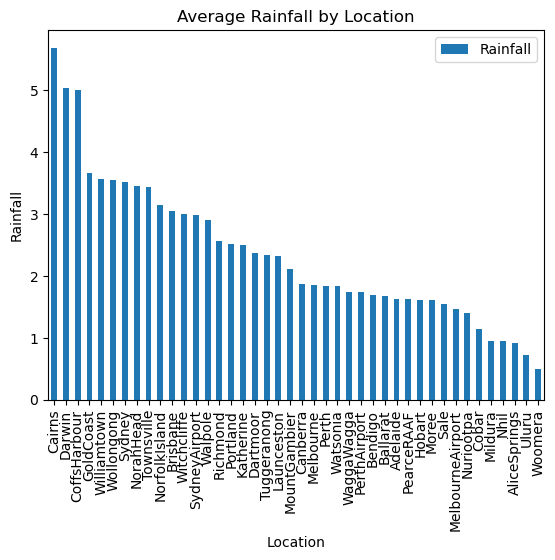

In [159]:
data_loc = data.groupby('Location').agg({'Rainfall':'mean'}).sort_values(by='Rainfall', ascending=False) 
data_loc.plot(kind='bar',xlabel='Location',ylabel='Rainfall')
plt.title ('Average Rainfall by Location')
plt.show()


plot windGustDir vs RainTomorrow

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

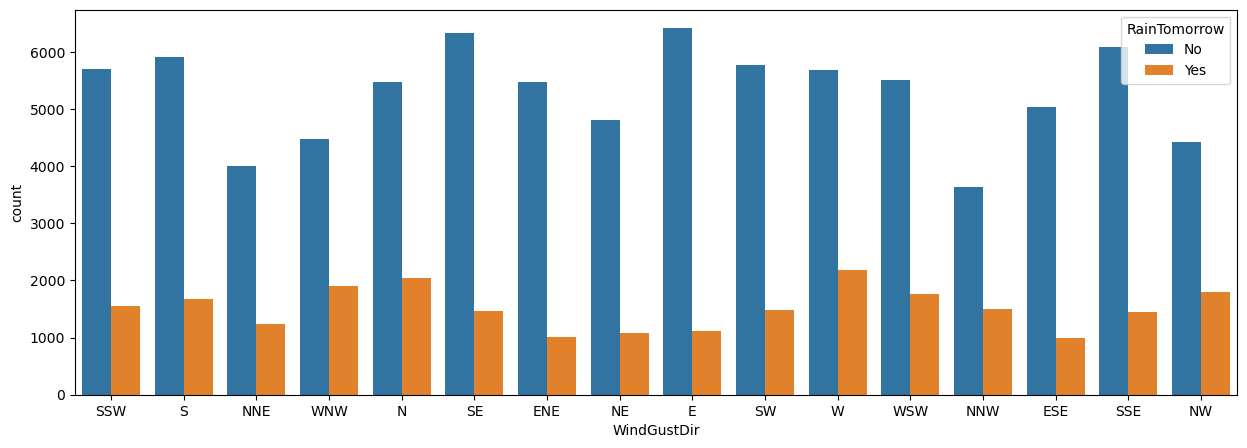

In [160]:
plt.figure(figsize = (15,5))
sb.countplot(x = 'WindGustDir', hue = 'RainTomorrow', data = data, linewidth = 2)

Data correlation:how each values are related -corr

In [6]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


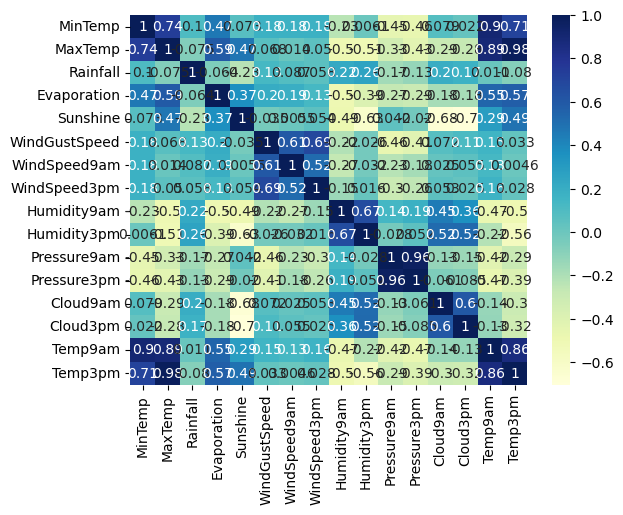

In [7]:
dp=sb.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [61]:
label=LabelEncoder()

In [62]:
data['Location']=label.fit_transform(data.Location)
data['WindGustDir']=label.fit_transform(data.WindGustDir)
data['WindDir9am']=label.fit_transform(data.WindDir9am)
data['WindDir3pm']=label.fit_transform(data.WindDir3pm)
data['RainToday']=label.fit_transform(data.RainToday)
data['RainTomorrow']=label.fit_transform(data.RainTomorrow)

DATA MODELING

In [63]:
x=data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]


In [64]:
x.values

array([[ 7. , 17.9, 35.2, ..., 26.6, 33.4,  0. ],
       [ 7. , 18.4, 28.9, ..., 20.3, 27. ,  0. ],
       [ 7. , 19.4, 37.6, ..., 28.7, 34.9,  0. ],
       ...,
       [34. ,  3.6, 25.3, ..., 10.9, 24.5,  0. ],
       [34. ,  5.4, 26.9, ..., 12.5, 26.1,  0. ],
       [34. ,  7.8, 27. , ..., 15.1, 26. ,  0. ]])

In [65]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday'],
      dtype='object')

In [66]:
y=data['RainTomorrow'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
sc=StandardScaler()

In [68]:
X=sc.fit_transform(x)

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.9,random_state=0)

Apply  Algorithms

In [80]:
#LogisticRegression
lg_model=LogisticRegression()

In [81]:
lg_model.fit(xtrain,ytrain)

LogisticRegression()

In [82]:
ypred=lg_model.predict(xtest)

In [83]:
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [84]:
cm=confusion_matrix(ytest,ypred)
cm

array([[7998,  474],
       [1149, 1276]], dtype=int64)

In [85]:
cr=classification_report(ytest,ypred)
cr

'              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.91      8472\n           1       0.73      0.53      0.61      2425\n\n    accuracy                           0.85     10897\n   macro avg       0.80      0.74      0.76     10897\nweighted avg       0.84      0.85      0.84     10897\n'

In [86]:
ac=accuracy_score(ytest,ypred)
ac

0.8510599247499312

In [87]:
#RandomForestClassifier
model1=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [88]:
model1.fit(xtrain,ytrain)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [89]:
ypred1=model1.predict(xtest)

In [90]:
ac1=accuracy_score(ytest,ypred1)
ac1

0.849499862347435

In [105]:
#KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)

In [106]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [107]:
ypred2=knn_model.predict(xtest)
ypred2

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0])

In [108]:
ac2=accuracy_score(ytest,ypred2)
ac2

0.838487657153345

CONCLUSION

Here we can understand that logistic regression is the best algorithm in this dataset prediction.
In logistic regression we get aacuracy 0.8510599247499312 accuracy.